In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
labels_df = pd.read_csv('~/data/train_labels.csv')
path = '/home/jupyter/data/train_resized/'
path_non_cropped = '/home/jupyter/data/train/'

labels_df['id'] = labels_df['id'] + '.tif'

In [2]:
#path = '/home/maciek/Pobrane/train-resize'

#labels_df = pd.read_csv('/home/maciek/Pobrane/train_labels.csv')
#labels_df['id'] = labels_df['id'] + '.tif'

In [3]:
data = ImageDataBunch.from_df(path, labels_df, valid_pct=0.2, ds_tfms=get_transforms(), size=128, bs=256).normalize(imagenet_stats)


In [4]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [5]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.411741,0.363647,0.159845,05:10
1,0.342340,0.305099,0.129076,04:15
2,0.316940,0.279880,0.116100,04:16
3,0.294282,0.264212,0.109624,04:16
4,0.295595,0.260751,0.107079,04:16


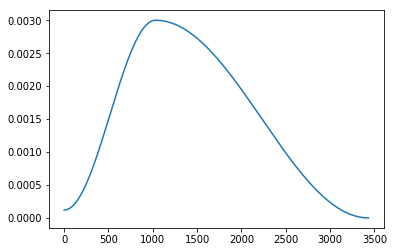

In [7]:
learn.recorder.plot_lr()

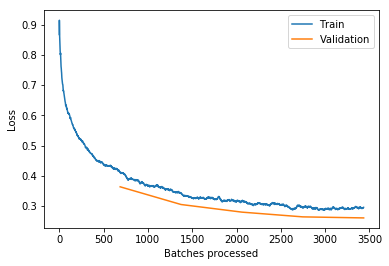

In [9]:
learn.recorder.plot_losses()

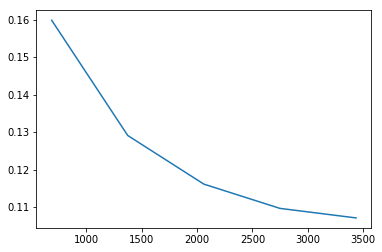

In [10]:
learn.recorder.plot_metrics()

[0, 1]

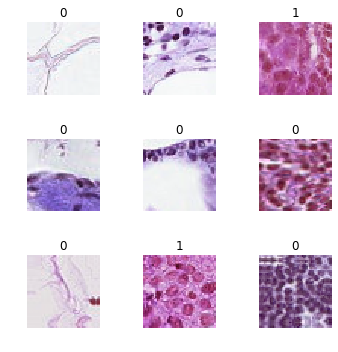

In [29]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/maciek/.torch/models/resnet34-333f7ec4.pth
87306240it [00:18, 4691018.20it/s]


In [31]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [32]:
learn.unfreeze()

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


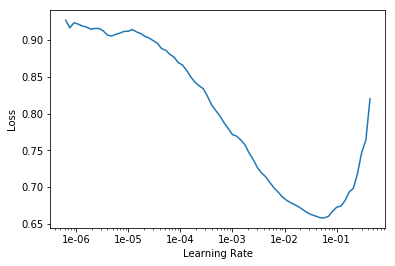

In [34]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.356682,0.343447,0.150347,01:53
1,0.310488,0.297358,0.122191,01:43
2,0.292545,0.282189,0.119941,01:43
3,0.273304,0.308283,0.128258,01:44
4,0.245867,0.244188,0.098102,01:43
5,0.221454,0.261334,0.106897,01:43
6,0.205310,0.222228,0.087604,01:43
7,0.197388,0.219121,0.085536,01:44


In [36]:
learn.save('resnet34-1')

In [37]:
learn.fit_one_cycle(8, max_lr=slice(1e-06,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.203051,0.222339,0.087081,01:43
1,0.191411,0.219602,0.085513,01:43
2,0.197467,0.220605,0.086740,01:43
3,0.200215,0.217205,0.085240,01:44
4,0.199265,0.221151,0.085922,01:44
5,0.200053,0.218863,0.085195,01:44
6,0.193444,0.217317,0.084536,01:44
7,0.197280,0.218854,0.085331,01:43


In [38]:
learn.save('resnet34-2')

#### validation set included in data (0.2%)

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_df(path, labels_df, valid_pct=0.2, ds_tfms=get_transforms(), size=48, bs=256).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.462860,0.437126,0.200023,04:21
1,0.408842,0.374387,0.163595,01:20
2,0.366515,0.346483,0.148688,01:20
3,0.351121,0.321273,0.135962,01:20
4,0.343010,0.318228,0.135121,01:20
5,0.331979,0.307057,0.127758,01:22
6,0.325209,0.309619,0.131667,01:20
7,0.323717,0.306478,0.129553,01:20


##### unfreeze od razu w first stage z domysla lr

In [5]:
data = ImageDataBunch.from_df(path, labels_df, valid_pct=0.2, ds_tfms=get_transforms(), size=48, bs=256).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.unfreeze()
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.348025,0.323706,0.135257,01:44
1,0.306521,0.305884,0.125236,01:44
2,0.293819,0.316725,0.134189,01:44
3,0.276305,0.254926,0.101738,01:44
4,0.251494,0.268683,0.109874,01:44
5,0.232005,0.231664,0.092262,01:44
6,0.207497,0.230134,0.090422,01:44
7,0.201191,0.227963,0.090012,01:44


#### najpierw froozen, potem unfreeze z domysla lr (plus inny rotate, wiec do porownania tylko w tej kategorii.

#### ale czy lepiej robi fozen a potem unfreeze, czy od razu unfreeze tu jest sprawdzane

#### z domyslna lr caly czas

In [6]:
data = ImageDataBunch.from_df(path, labels_df, valid_pct=0.2, ds_tfms=get_transforms(max_rotate=25), size=48, bs=256).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.458919,0.438230,0.201159,01:19
1,0.399210,0.393622,0.174526,01:22
2,0.371307,0.353543,0.154301,01:20
3,0.349445,0.326059,0.138984,01:20
4,0.339623,0.317690,0.132780,01:20
5,0.332740,0.316541,0.135689,01:21
6,0.329492,0.310276,0.130940,01:20
7,0.328113,0.310937,0.130781,01:20


In [7]:
learn.unfreeze()
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.317044,0.300787,0.125554,01:44
1,0.299283,0.314162,0.133689,01:44
2,0.287021,0.303852,0.133758,01:44
3,0.263703,0.257445,0.103806,01:44
4,0.247300,0.261589,0.108556,01:45
5,0.227497,0.230323,0.093376,01:44
6,0.211828,0.227193,0.091194,01:44
7,0.202478,0.221078,0.088126,01:44


#### ze zmieniona lr w unfreeze

In [8]:

data = ImageDataBunch.from_df(path, labels_df, valid_pct=0.2, ds_tfms=get_transforms(flip_vert=True, max_zoom=0, max_lighting=0.7), size=48, bs=256).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.514570,0.456408,0.208431,01:19
1,0.448499,0.403768,0.178321,01:21
2,0.407959,0.368174,0.160368,01:19
3,0.398088,0.354081,0.154687,01:19
4,0.387715,0.345678,0.150415,01:19
5,0.373580,0.335013,0.144597,01:20
6,0.367664,0.333148,0.143734,01:19
7,0.373606,0.332393,0.143120,01:20


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


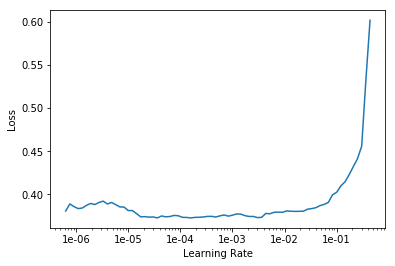

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


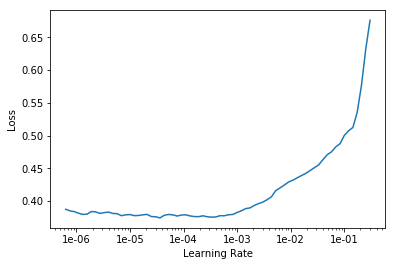

In [11]:
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(8, max_lr=slice(3e-06, 3e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.362246,0.327353,0.140120,01:43


Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fe6aeba4c80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fe6aeba4c80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessi

RuntimeError: DataLoader worker (pid 5798) is killed by signal: Aborted. 

### first train with cropped images, then after unfreezing with non-cropped

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_df(path, labels_df, valid_pct=0.2, ds_tfms=get_transforms(), size=48, bs=256).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5)

In [ ]:
learn.save('stage-1-resnet34-cropped')

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5)

In [ ]:
learn.save('stage-2-resnet34-cropped')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


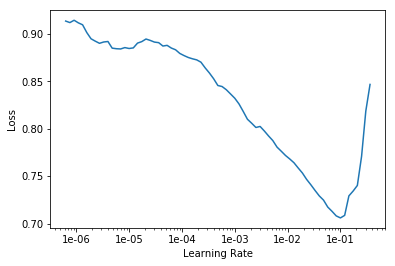

In [3]:
<<<<<<< local
np.random.seed(42)
data = ImageDataBunch.from_df(path, labels_df, valid_pct=0.2, ds_tfms=get_transforms(), size=48, bs=256).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

learn.lr_find()
learn.recorder.plot()
=======
data = ImageDataBunch.from_df(path_non_cropped, labels_df, valid_pct=0.2, ds_tfms=get_transforms(), size=48, bs=256).normalize(imagenet_stats)

learn.data = data
>>>>>>> remote

<span style="color:red">**<<<<<<< local**</span>

In [5]:
learn.fit_one_cycle(5, slice(0.001))

epoch,train_loss,valid_loss,error_rate,time
0,0.462853,0.443414,0.204909,03:50
1,0.411555,0.392695,0.175412,01:18
2,0.394300,0.383200,0.170753,01:19
3,0.383520,0.363371,0.158027,01:19
4,0.382017,0.363016,0.157823,01:20


In [6]:
learn.save('stage-1-resnet34-cropped')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


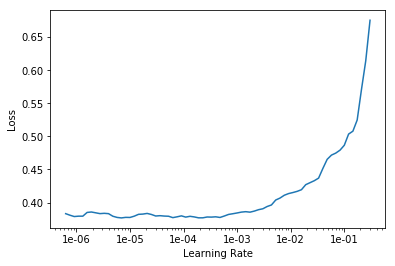

In [7]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(5, slice(1e-5, 0.001/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.350331,0.328483,0.141075,01:44
1,0.317717,0.299388,0.126349,01:45
2,0.301219,0.276061,0.115010,01:46
3,0.272384,0.271132,0.113101,01:46
4,0.268473,0.270484,0.111851,01:46


In [9]:
learn.save('stage-2-resnet34-cropped')

In [12]:
data = ImageDataBunch.from_df(path_non_cropped, labels_df, valid_pct=0.2, ds_tfms=get_transforms(), size=96, bs=128).normalize(imagenet_stats)

learn.data = data


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


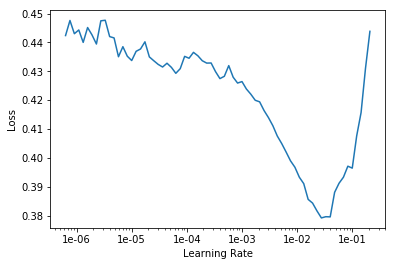

In [13]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(5, slice(0.001))

epoch,train_loss,valid_loss,error_rate,time
0,0.239866,0.217108,0.087308,05:15
1,0.220584,0.190166,0.075946,03:06
2,0.206158,0.178466,0.069788,03:06
3,0.192261,0.169898,0.065765,03:06
4,0.194526,0.169419,0.065879,03:06


In [18]:
learn.save('stage-3-resnet34-uncropped')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


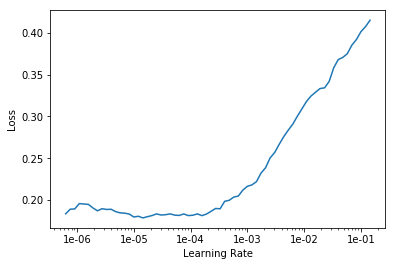

In [16]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(5, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.178952,0.159244,0.060561,04:21
1,0.150338,0.133537,0.048835,04:21
2,0.128668,0.120242,0.043404,04:22
3,0.112102,0.108370,0.038473,04:22
4,0.098674,0.109249,0.039405,04:22


In [19]:
learn.save('/home/jupyter/fastai/stage-4-resnet34-uncropped')

<span style="color:red">**=======**</span>

In [ ]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5)

In [ ]:
learn.save('stage-3-resnet34-uncropped')

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5)

<span style="color:red">**>>>>>>> remote**</span>

### lest do it again

In [3]:
data2 = ImageDataBunch.from_df(path, labels_df, ds_tfms=get_transforms(flip_vert=True), size=48, bs=256).normalize(imagenet_stats)
learn2 = cnn_learner(data2, models.resnet34, metrics=error_rate)


In [4]:
learn2.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.468552,0.449124,0.210272,05:16
1,0.403066,0.385654,0.167776,01:14
2,0.364822,0.348663,0.150892,01:15
3,0.352303,0.334551,0.144143,01:14
4,0.337902,0.316325,0.134348,01:16
5,0.335908,0.321299,0.138621,01:14
6,0.331066,0.317280,0.136007,01:15
7,0.328700,0.314164,0.134530,01:14


In [5]:
learn2.save('/home/jupyter/fastai/learn2-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


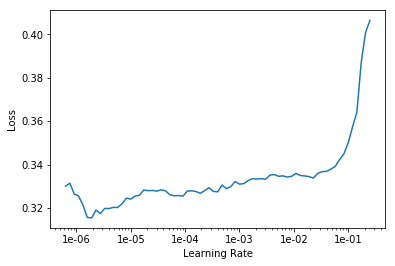

In [6]:
learn2.lr_find()
learn2.recorder.plot()

In [7]:
learn2.unfreeze()

In [9]:
learn2.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.322792,0.312518,0.134053,01:42
1,0.311998,0.298122,0.127122,01:42
2,0.311139,0.292150,0.123304,01:43
3,0.310845,0.296078,0.126758,01:43


### resnet50 try, wrong ofc. pls correct

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/jupyter/.torch/models/resnet50-19c8e357.pth
102502400it [00:00, 150182757.08it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


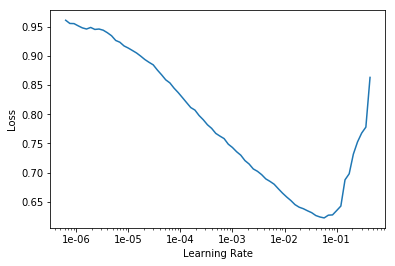

In [9]:
data3 = ImageDataBunch.from_df(path, labels_df, ds_tfms=get_transforms(), size=86, bs=256).normalize(imagenet_stats)
learn3 = cnn_learner(data3, models.resnet50, metrics=error_rate)
learn3.unfreeze()
learn3.lr_find()
learn3.recorder.plot()

learn3.fit_one_cycle(8, max_lr=slice(3e-06,1e-04))

### uncropped images, probably thats not the way it should be

In [15]:
path_non_resized = '/home/jupyter/data/train/'

In [17]:
data_non_res = ImageDataBunch.from_df(path_non_resized, labels_df, ds_tfms=get_transforms(), size=96, bs=256).normalize(imagenet_stats)
learn4 = cnn_learner(data_non_res, models.resnet34, metrics=error_rate)
learn4.unfreeze()
learn4.fit_one_cycle(8, max_lr=slice(1e-06,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.449216,0.363500,0.158209,06:06
1,0.308151,0.265204,0.109738,04:02
2,0.248984,0.223655,0.090694,04:03
3,0.210033,0.198372,0.078718,04:02
4,0.203441,0.186542,0.073401,04:03
5,0.188633,0.178842,0.069606,04:02
6,0.184250,0.174347,0.067992,04:03
7,0.190348,0.173772,0.067970,04:03


In [ ]:
data_non_res = ImageDataBunch.from_df(path_non_resized, labels_df, ds_tfms=get_transforms(), size=96, bs=256).normalize(imagenet_stats)
learn5 = cnn_learner(data_non_res, models.resnet50, metrics=error_rate)
learn5.unfreeze()
#learn3.lr_find()
learn5.fit_one_cycle(8, max_lr=slice(1e-06,1e-04))